In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


In [3]:
target = 'CHURN'

In [4]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

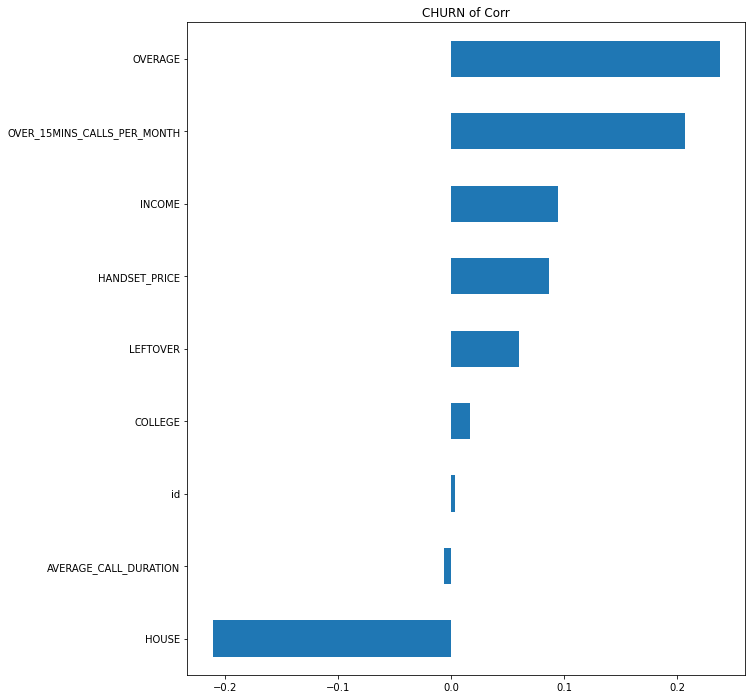

In [5]:
plt.title('CHURN of Corr')

data.drop("CHURN", axis = 1).corrwith(data.CHURN).sort_values().plot(kind='barh', figsize = (10, 12))

plt.show()

In [6]:
# 위의 그림에서 'id','AVERAGE_CALL_DURATION','COLLEGE' 하위 3개  
# p.value값을 보고 'REPORTED_SATISFACTION','CONSIDERING_CHANGE_OF_PLAN' 삭제

x.drop(['id','AVERAGE_CALL_DURATION','COLLEGE','REPORTED_SATISFACTION','CONSIDERING_CHANGE_OF_PLAN'], axis = 1, inplace = True)

In [7]:
x.isna().sum()

INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
REPORTED_USAGE_LEVEL             0
dtype: int64

In [8]:
# 가변수화 

dum_cols = ['REPORTED_USAGE_LEVEL']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)

x.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little
0,47711,183,17,730589.0,192,19,0,1,0,0
1,74132,191,43,535092.0,349,15,0,0,0,1
2,150419,0,14,204004.0,682,0,0,0,1,0
3,159567,0,58,281969.0,634,1,0,0,1,0
4,23392,0,0,216707.0,233,0,0,0,0,1


In [9]:
# NaN 제거

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

INCOME                              0
OVERAGE                             0
LEFTOVER                            0
HOUSE                               0
HANDSET_PRICE                       0
OVER_15MINS_CALLS_PER_MONTH         0
REPORTED_USAGE_LEVEL_high           0
REPORTED_USAGE_LEVEL_little         0
REPORTED_USAGE_LEVEL_very_high      0
REPORTED_USAGE_LEVEL_very_little    0
dtype: int64

데이터 분할

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3000, random_state = 2022)
# test는 마지막에 검사용으로 활용

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=3000, random_state = 2022)

In [12]:
# 스케일링

from sklearn.preprocessing import MinMaxScaler

col_x = list(x)
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

In [13]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

 머신러닝

In [14]:
# Logistic Regression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1520
           1       0.63      0.62      0.63      1480

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [15]:
# DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param = {'max_depth': range(1,101)}

model_dt = GridSearchCV(model_dt, param, cv=5, scoring='accuracy')

In [16]:
model_dt.fit(x_train,y_train)
model_dt.best_params_, model_dt.best_score_,model_dt.best_estimator_

({'max_depth': 5}, 0.69975, DecisionTreeClassifier(max_depth=5))

In [17]:
y_pred = model_dt.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1520
           1       0.71      0.70      0.70      1480

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.71      0.71      0.71      3000



In [18]:
# plt.figure(figsize=(5,15))
# plt.barh(y=list(x), width=model_dt.best_estimator_.feature_importances_)
# plt.show()

In [19]:
# from sklearn.neighbors import KNeighborsClassifier

In [20]:
m_knn = KNeighborsClassifier()
params = {'n_neighbors':range(3,20)}
m_knn_gs = GridSearchCV(m_knn, param_grid = params)

In [21]:
m_knn_gs.fit(x_train, y_train)
m_knn_gs.best_params_

{'n_neighbors': 19}

In [22]:
val_pred_knn = m_knn_gs.predict(x_val)
print(classification_report(y_val, val_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      1520
           1       0.58      0.71      0.64      1480

    accuracy                           0.61      3000
   macro avg       0.61      0.61      0.60      3000
weighted avg       0.61      0.61      0.60      3000



In [23]:
# model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# param = {
#     'max_depth':range(1, 21),
#     'learning_rate':[0.01,0.1,0.2],
#     'n_estimators':[20,201,10]
# }

# model_xgb = RandomizedSearchCV(model,
#                               param,
#                               cv=10,
#                               n_iter=20)

In [24]:
# model_xgb.fit(x_train, y_train)

In [25]:
# y_pred = model_xgb.predict(x_val)
# print(classification_report(y_val, y_pred))

딥러닝

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
epochs = 1000
batch_size = 16
es = EarlyStopping(monitor='val_loss',
                  min_delta=0,
                  patience=30,
                  verbose=1,
                  restore_best_weights=True)

In [28]:
x_train.shape

(12000, 10)

In [29]:
clear_session()

il = Input(shape=(10,))
ol = Dense(1, activation='sigmoid')(il)

model_dl_1 = Model(il, ol)

model_dl_1.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_dl_1.fit(x_train_s, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.7123 - accuracy: 0.5337 - val_loss: 0.6863 - val_accuracy: 0.5562
Epoch 2/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6769 - accuracy: 0.5840 - val_loss: 0.6677 - val_accuracy: 0.6083
Epoch 3/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6606 - accuracy: 0.6165 - val_loss: 0.6563 - val_accuracy: 0.6279
Epoch 4/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6504 - accuracy: 0.6235 - val_loss: 0.6500 - val_accuracy: 0.6308
Epoch 5/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6439 - accuracy: 0.6295 - val_loss: 0.6463 - val_accuracy: 0.6292
Epoch 6/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6397 - accuracy: 0.6310 - val_loss: 0.6441 - val_accuracy: 0.6292
Epoch 7/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6370 - accuracy: 0.6323 - val_loss: 0.6430 - val_accuracy:

In [31]:
clear_session()

il = Input(shape=(10,))
h = Dense(256, activation='relu')(il)
h = Dense(64, activation='relu')(h)
h = Dense(32, activation='relu')(h)
ol = Dense(1, activation='sigmoid')(h)

model_dl_2 = Model(il, ol)

model_dl_2.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,377
Trainable params: 21,377
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_dl_2.fit(x_train_s, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
600/600 [==============================] - 2s 2ms/step - loss: 0.6292 - accuracy: 0.6464 - val_loss: 0.6455 - val_accuracy: 0.6471
Epoch 2/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6166 - accuracy: 0.6601 - val_loss: 0.6277 - val_accuracy: 0.6517
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6107 - accuracy: 0.6684 - val_loss: 0.6258 - val_accuracy: 0.6583
Epoch 4/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6082 - accuracy: 0.6746 - val_loss: 0.6131 - val_accuracy: 0.6725
Epoch 5/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.6774 - val_loss: 0.6213 - val_accuracy: 0.6683
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.6758 - val_loss: 0.6099 - val_accuracy: 0.6754
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.6861 - val_loss: 0.6111 - val_accuracy:

In [33]:
clear_session()

il = Input(shape=(10,))
h = Dense(32, activation='relu')(il)
ol = Dense(1, activation='sigmoid')(h)

model_dl_3 = Model(il, ol)

model_dl_3.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_dl_3.fit(x_train_s, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.6069 - val_loss: 0.6415 - val_accuracy: 0.6242
Epoch 2/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6318 - accuracy: 0.6460 - val_loss: 0.6412 - val_accuracy: 0.6396
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.6483 - val_loss: 0.6351 - val_accuracy: 0.6338
Epoch 4/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6250 - accuracy: 0.6544 - val_loss: 0.6358 - val_accuracy: 0.6304
Epoch 5/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6223 - accuracy: 0.6604 - val_loss: 0.6315 - val_accuracy: 0.6438
Epoch 6/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6205 - accuracy: 0.6609 - val_loss: 0.6278 - val_accuracy: 0.6504
Epoch 7/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.6182 - accuracy: 0.6603 - val_loss: 0.6247 - val_accuracy:

600/600 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.6849 - val_loss: 0.6047 - val_accuracy: 0.6837
Epoch 58/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5893 - accuracy: 0.6825 - val_loss: 0.6002 - val_accuracy: 0.6808
Epoch 59/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5898 - accuracy: 0.6829 - val_loss: 0.6013 - val_accuracy: 0.6850
Epoch 60/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5888 - accuracy: 0.6822 - val_loss: 0.6036 - val_accuracy: 0.6779
Epoch 61/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.6843 - val_loss: 0.6042 - val_accuracy: 0.6762
Epoch 62/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.6832 - val_loss: 0.6003 - val_accuracy: 0.6842
Epoch 63/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5884 - accuracy: 0.6837 - val_loss: 0.6022 - val_accuracy: 0.6779

600/600 [==============================] - 1s 1ms/step - loss: 0.5824 - accuracy: 0.6877 - val_loss: 0.6007 - val_accuracy: 0.6888
Epoch 114/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5823 - accuracy: 0.6864 - val_loss: 0.5994 - val_accuracy: 0.6888
Epoch 115/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5818 - accuracy: 0.6880 - val_loss: 0.6013 - val_accuracy: 0.6842
Epoch 116/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.6877 - val_loss: 0.6011 - val_accuracy: 0.6908
Epoch 117/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5819 - accuracy: 0.6894 - val_loss: 0.6010 - val_accuracy: 0.6900
Epoch 118/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5818 - accuracy: 0.6928 - val_loss: 0.6019 - val_accuracy: 0.6821
Epoch 119/1000
600/600 [==============================] - 1s 1ms/step - loss: 0.5816 - accuracy: 0.6879 - val_loss: 0.6001 - val_accuracy: 

In [35]:
clear_session()

il = Input(shape=(10,))
h = Dense(512, activation='relu')(il)
h = Dense(256, activation='relu')(h)
h = Dense(128, activation='relu')(h)
h = Dense(64, activation='relu')(h)
h = Dense(32, activation='relu')(h)
ol = Dense(1, activation='sigmoid')(h)

model_dl_4 = Model(il, ol)

model_dl_4.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33    

In [36]:
model_dl_4.fit(x_train_s, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])


Epoch 1/1000
600/600 [==============================] - 3s 3ms/step - loss: 0.6341 - accuracy: 0.6416 - val_loss: 0.6240 - val_accuracy: 0.6596
Epoch 2/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6171 - accuracy: 0.6667 - val_loss: 0.6218 - val_accuracy: 0.6650
Epoch 3/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6143 - accuracy: 0.6695 - val_loss: 0.6158 - val_accuracy: 0.6696
Epoch 4/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.6081 - accuracy: 0.6761 - val_loss: 0.6111 - val_accuracy: 0.6729
Epoch 5/1000
600/600 [==============================] - 2s 3ms/step - loss: 0.6028 - accuracy: 0.6782 - val_loss: 0.6144 - val_accuracy: 0.6779
Epoch 6/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5994 - accuracy: 0.6794 - val_loss: 0.6001 - val_accuracy: 0.6833
Epoch 7/1000
600/600 [==============================] - 1s 2ms/step - loss: 0.5938 - accuracy: 0.6857 - val_loss: 0.6028 - val_accuracy:

# 성능 비교
## 평가지표 : classification_reportd의 accuracy + 1의 f1-score

###  - accuracy를 통해 정확도를 보고
###  - 1의 f1-score를 통해 전체적인 성능 확인

In [37]:
y_pred = model_dl_1.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1520
           1       0.65      0.62      0.64      1480

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [38]:
y_pred = model_dl_2.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1520
           1       0.70      0.66      0.68      1480

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000



In [39]:
y_pred = model_dl_3.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1520
           1       0.67      0.70      0.69      1480

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



In [40]:
y_pred = model_dl_4.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1520
           1       0.70      0.70      0.70      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



In [41]:
from sklearn.metrics import f1_score, accuracy_score

result_f1={}
result_acc={}

y_pred = model_lr.predict(x_val)
result_f1['Logistic Regression'] = f1_score(y_val, y_pred)
result_acc['Logistic Regression'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1520
           1       0.63      0.62      0.63      1480

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [42]:
y_pred = model_dt.predict(x_val)
result_f1['Decision Tree'] = f1_score(y_val, y_pred)
result_acc['Decision Tree'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1520
           1       0.71      0.70      0.70      1480

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.71      0.71      0.71      3000



In [43]:
y_pred = m_knn_gs.predict(x_val)
result_f1['KNeighbors'] = f1_score(y_val, y_pred)
result_acc['KNeighbors'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      1520
           1       0.58      0.71      0.64      1480

    accuracy                           0.61      3000
   macro avg       0.61      0.61      0.60      3000
weighted avg       0.61      0.61      0.60      3000



In [44]:
y_pred = model_dl_1.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
result_f1['DL 1'] = f1_score(y_val, y_pred)
result_acc['DL 1'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1520
           1       0.65      0.62      0.64      1480

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [45]:
y_pred = model_dl_2.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
result_f1['DL 2'] = f1_score(y_val, y_pred)
result_acc['DL 2'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1520
           1       0.70      0.66      0.68      1480

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000



In [46]:
y_pred = model_dl_3.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
result_f1['DL 3'] = f1_score(y_val, y_pred)
result_acc['DL 3'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1520
           1       0.67      0.70      0.69      1480

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



In [47]:
y_pred = model_dl_4.predict(x_val_s)
y_pred = y_pred.round().reshape(-1)
result_f1['DL 4'] = f1_score(y_val, y_pred)
result_acc['DL 4'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1520
           1       0.70      0.70      0.70      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



In [48]:
for (name, acc), (_, f1) in zip(result_acc.items(), result_f1.items()):
    print('='*30)
    print(name)
    print('-'*30)
    print('Accuracy: ', round(acc,2), 'f1-score: ', round(f1,2))

Logistic Regression
------------------------------
Accuracy:  0.64 f1-score:  0.63
Decision Tree
------------------------------
Accuracy:  0.71 f1-score:  0.7
KNeighbors
------------------------------
Accuracy:  0.61 f1-score:  0.64
DL 1
------------------------------
Accuracy:  0.65 f1-score:  0.64
DL 2
------------------------------
Accuracy:  0.69 f1-score:  0.68
DL 3
------------------------------
Accuracy:  0.68 f1-score:  0.69
DL 4
------------------------------
Accuracy:  0.7 f1-score:  0.7


### accuracy와 f10-score 둘다 높은  Decision Tree , DL 4 사용

### 최종 성능 평가( Test )


In [49]:
# 스케일링

x_test_s = scaler.transform(x_test)
x_test.shape, y_test.shape, y_test.value_counts()

((3000, 10),
 (3000,),
 0    1540
 1    1460
 Name: CHURN, dtype: int64)

In [50]:
result_f1_test = {}
result_acc_test = {}

y_pred = model_lr.predict(x_test)
result_f1_test['Logistic Regression'] = f1_score(y_test, y_pred)
result_acc_test['Logistic Regression'] = accuracy_score(y_test, y_pred)

y_pred = model_dt.predict(x_test)
result_f1_test['Decision Tree'] = f1_score(y_test, y_pred)
result_acc_test['Decision Tree'] = accuracy_score(y_test, y_pred)

y_pred = m_knn_gs.predict(x_test)
result_f1_test['KNeighbors'] = f1_score(y_test, y_pred)
result_acc_test['KNeighbors'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_1.predict(x_test_s)
y_pred = y_pred.round().reshape(-1)
result_f1_test['DL 1'] = f1_score(y_test, y_pred)
result_acc_test['DL 1'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_2.predict(x_test_s)
y_pred = y_pred.round().reshape(-1)
result_f1_test['DL 2'] = f1_score(y_test, y_pred)
result_acc_test['DL 2'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_3.predict(x_test_s)
y_pred = y_pred.round().reshape(-1)
result_f1_test['DL 3'] = f1_score(y_test, y_pred)
result_acc_test['DL 3'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_4.predict(x_test_s)
y_pred = y_pred.round().reshape(-1)
result_f1_test['DL 4'] = f1_score(y_test, y_pred)
result_acc_test['DL 4'] = accuracy_score(y_test, y_pred)

In [51]:
for (name, acc), (_, f1) in zip(result_acc_test.items(), result_f1_test.items()):
    print('='*30)
    print(name)
    print('-'*30)
    print('Accuracy: ', round(acc,2), 'f1-score: ', round(f1,2))

Logistic Regression
------------------------------
Accuracy:  0.62 f1-score:  0.61
Decision Tree
------------------------------
Accuracy:  0.68 f1-score:  0.67
KNeighbors
------------------------------
Accuracy:  0.61 f1-score:  0.64
DL 1
------------------------------
Accuracy:  0.63 f1-score:  0.61
DL 2
------------------------------
Accuracy:  0.67 f1-score:  0.66
DL 3
------------------------------
Accuracy:  0.67 f1-score:  0.67
DL 4
------------------------------
Accuracy:  0.68 f1-score:  0.67


In [ ]:
 # 예상했던 Decision Tree , DL 4 가 test set에 대하여 좋게 보인다.
 # 예상과 달리 test set에서의 DL 2, DL 3의 모델도 Decision Tree와 DL 4와 큰 차이는 없었다.
 # 새로운 feature 값을 도출해서 다시 성능을 내봐야겠다.